<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data wrangling</a></span><ul class="toc-item"><li><span><a href="#Checkup-Exercise-Set-I" data-toc-modified-id="Checkup-Exercise-Set-I-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Checkup Exercise Set I</a></span></li></ul></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Choosing-K:-The-Elbow-Sum-of-Squares-Method" data-toc-modified-id="Choosing-K:-The-Elbow-Sum-of-Squares-Method-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Choosing K: The Elbow Sum-of-Squares Method</a></span></li><li><span><a href="#Checkup-Exercise-Set-II" data-toc-modified-id="Checkup-Exercise-Set-II-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Checkup Exercise Set II</a></span></li><li><span><a href="#Choosing-K:-The-Silhouette-Method" data-toc-modified-id="Choosing-K:-The-Silhouette-Method-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Choosing K: The Silhouette Method</a></span></li><li><span><a href="#Checkup-Exercise-Set-III" data-toc-modified-id="Checkup-Exercise-Set-III-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Checkup Exercise Set III</a></span></li><li><span><a href="#Choosing-$K$:-The-Gap-Statistic" data-toc-modified-id="Choosing-$K$:-The-Gap-Statistic-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Choosing $K$: The Gap Statistic</a></span></li><li><span><a href="#Aside:-Choosing-$K$-when-we-Have-Labels" data-toc-modified-id="Aside:-Choosing-$K$-when-we-Have-Labels-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Aside: Choosing $K$ when we Have Labels</a></span></li></ul></li><li><span><a href="#Visualizing-Clusters-using-PCA" data-toc-modified-id="Visualizing-Clusters-using-PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizing Clusters using PCA</a></span><ul class="toc-item"><li><span><a href="#Checkup-Exercise-Set-IV" data-toc-modified-id="Checkup-Exercise-Set-IV-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checkup Exercise Set IV</a></span></li><li><span><a href="#Exercise-Set-V" data-toc-modified-id="Exercise-Set-V-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercise Set V</a></span></li></ul></li><li><span><a href="#Other-Clustering-Algorithms" data-toc-modified-id="Other-Clustering-Algorithms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Other Clustering Algorithms</a></span><ul class="toc-item"><li><span><a href="#Clustering-Algorithms-in-Scikit-learn" data-toc-modified-id="Clustering-Algorithms-in-Scikit-learn-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Clustering Algorithms in Scikit-learn</a></span></li><li><span><a href="#Exercise-Set-VI" data-toc-modified-id="Exercise-Set-VI-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Exercise Set VI</a></span></li></ul></li></ul></div>

# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [102]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [103]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [104]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [105]:
#your turn

Let's start by looking at the number of missing values per variable:

In [106]:
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
offer_id     32 non-null int64
campaign     32 non-null object
varietal     32 non-null object
min_qty      32 non-null int64
discount     32 non-null int64
origin       32 non-null object
past_peak    32 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 1.6+ KB


In [107]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
customer_name    324 non-null object
offer_id         324 non-null int64
n                324 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.7+ KB


Neither of the data frames contains any values and coded as missing. But let's look at the unique values for each variable to determine if any other encodings were used for missing values.

In [108]:
for v in df_offers:
    print('{}:\n{}\n'
              .format(v, df_offers.loc[:, v].unique()))

offer_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]

campaign:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

varietal:
['Malbec' 'Pinot Noir' 'Espumante' 'Champagne' 'Cabernet Sauvignon'
 'Prosecco' 'Chardonnay' 'Merlot' 'Pinot Grigio']

min_qty:
[ 72 144   6  12]

discount:
[56 17 32 48 44 86 40 45 57 52 85 83 43 64 19 88 47 50 66 82 63 39 34 59
 87 54 89]

origin:
['France' 'Oregon' 'New Zealand' 'Chile' 'Australia' 'South Africa'
 'California' 'Italy' 'Germany']

past_peak:
[False  True]



The offers data frame looks fine. Let's check the transactions data next:

In [109]:
for v in df_transactions:
    print('{}:\n{}\n'
              .format(v, df_transactions.loc[:, v].unique()))

customer_name:
['Smith' 'Johnson' 'Williams' 'Brown' 'Jones' 'Miller' 'Davis' 'Garcia'
 'Rodriguez' 'Wilson' 'Martinez' 'Anderson' 'Taylor' 'Thomas' 'Hernandez'
 'Moore' 'Martin' 'Jackson' 'Thompson' 'White' 'Lopez' 'Lee' 'Gonzalez'
 'Harris' 'Clark' 'Lewis' 'Robinson' 'Walker' 'Perez' 'Hall' 'Young'
 'Allen' 'Sanchez' 'Wright' 'King' 'Scott' 'Green' 'Baker' 'Adams'
 'Nelson' 'Hill' 'Ramirez' 'Campbell' 'Mitchell' 'Roberts' 'Carter'
 'Phillips' 'Evans' 'Turner' 'Torres' 'Parker' 'Collins' 'Edwards'
 'Stewart' 'Flores' 'Morris' 'Nguyen' 'Murphy' 'Rivera' 'Cook' 'Rogers'
 'Morgan' 'Peterson' 'Cooper' 'Reed' 'Bailey' 'Bell' 'Gomez' 'Kelly'
 'Howard' 'Ward' 'Cox' 'Diaz' 'Richardson' 'Wood' 'Watson' 'Brooks'
 'Bennett' 'Gray' 'James' 'Reyes' 'Cruz' 'Hughes' 'Price' 'Myers' 'Long'
 'Foster' 'Sanders' 'Ross' 'Morales' 'Powell' 'Sullivan' 'Russell' 'Ortiz'
 'Jenkins' 'Gutierrez' 'Perry' 'Butler' 'Barnes' 'Fisher']

offer_id:
[ 2 24 17 26 18 22 31  7 29 30  8  6 10 14 15 23 12 25 28  1  4  9 11

The transaction data also don't seem to contain any missing values, but notably the column "n" only contains one unique value, 1. As we will see shortly, though, this is okay in our case.

Another issue is that  we don't have data about which customers did *not* respond to the marketing campaign. I did not find any data documentation, so I assume that the campaigns were sent out to all customers, because otherwise the exercises below don't have a solution.

In [110]:
# Merge data
combined_df = pd.merge(df_offers, df_transactions, on='offer_id')
combined_df.head() 

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [111]:
# Create pivot table showing which customers responded to which offer
x = pd.pivot_table(combined_df, index='customer_name', 
                        columns='offer_id', values='n', fill_value=0)
x.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [112]:
# your turn

Smaller values for the sum of squares are generally better, but if it gets too small, we are likely overfitting.

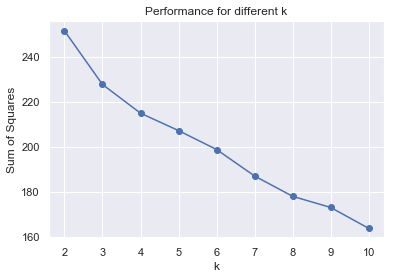

In [113]:
import numpy as np
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Convert data to matrix
x_cols = np.matrix(x)

# Initialize Ks
ks = range(2, 11)
# Initialize Series to hold sum of squares for each K
ss = pd.Series(np.NaN, index=ks)
# Find clusters and compute sum of squares
for k in ks:
    kmc = KMeans(n_clusters=k, random_state=0)
    # For each observation, compute distance to to each cluster center
    distances_to_all = kmc.fit_transform(x_cols)
    # Get distance to closest cluster center
    distance = np.min(distances_to_all, axis=1)
    # Compute sum of squares
    ss.loc[k] = sum(distance**2)
    
# Plot results
plt.plot(ss.index, ss, linestyle='-', marker='o')
plt.xlabel('k')
plt.ylabel('Sum of Squares')
plt.title('Performance for different k');

Unfortunately, the plot does not show a clear cut-off for the best k after which additional clusters do not reduce the within-cluster variance by much. Instead, it seems to decline almost linearly.

Since the improvement from 9 to 10 is still as least as good as the improvement from 3 to 4, I choose K = 10. 

Let's see how many points fall into each cluster:

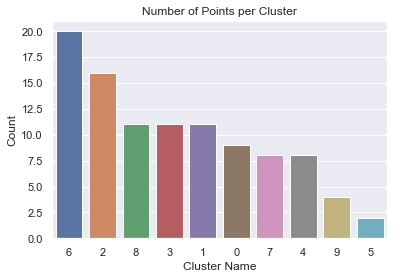

In [114]:
# Get clusters for optimum K (10)
kmc10 = KMeans(n_clusters=10, random_state=1)
# Assign each point to its optimal cluster
clusters10 = pd.Series(kmc10.fit_predict(x_cols))
# Count points per cluster
cluster_counts = clusters10.value_counts()
# Convert cluster names to string (to prevent sorting
# numerically in bar plot)
cluster_names = [str(c) for c in cluster_counts.index]
# Make bar plot
sns.barplot(x=cluster_names,
            y=cluster_counts.values,
            order=cluster_names)
plt.xlabel('Cluster Name')
plt.ylabel('Count')
plt.title('Number of Points per Cluster');

This reveals that the two clusters with the the lowest count only have 2 and 4 observations. This is clearly too low, because it seems unlikely that these clusters would generalize well to future customers.

Let's see if the other methods for selecting k work better:

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

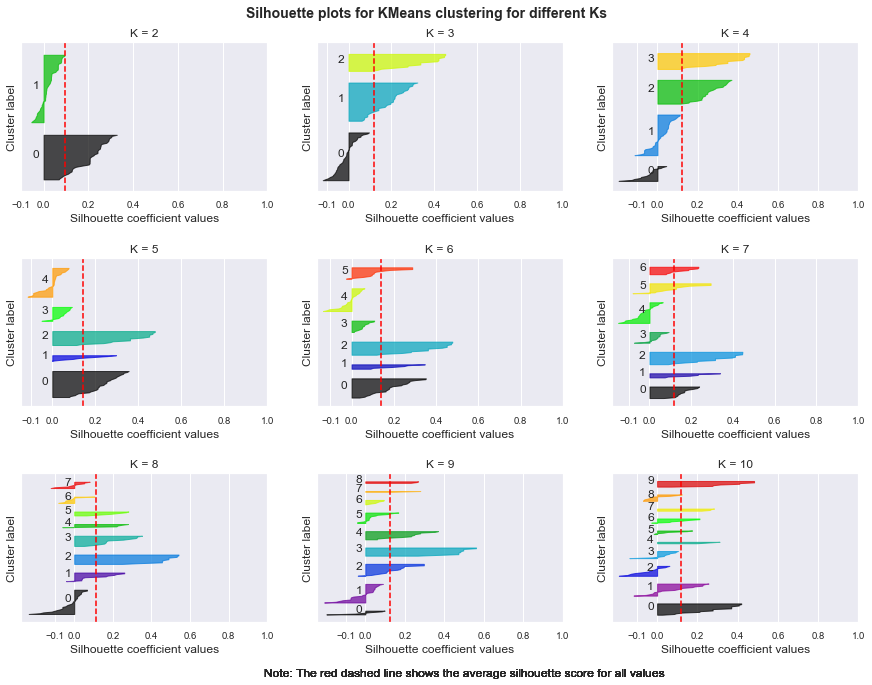

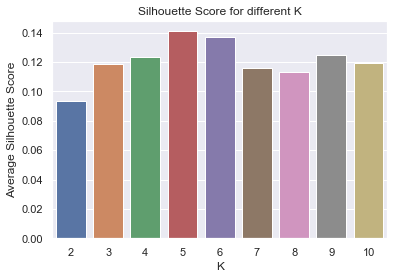

In [115]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 11)
silhouette_avg = {}

fig, ax = plt.subplots(3, 3, figsize=(15,10))
for subplot, n_clusters in zip(ax.ravel(), range_n_clusters):
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    subplot.set_ylim([0, len(x_cols) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    # Compute average silhouette score and save it
    silhouette_avg[n_clusters] = silhouette_score(x_cols, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        subplot.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        subplot.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    subplot.set_xlabel("Silhouette coefficient values")
    subplot.set_ylabel("Cluster label")
    subplot.set_title('K = {}'.format(n_clusters))
    subplot.tick_params(labelsize=9.5)

    # The vertical line for average silhouette score of all the values
    subplot.axvline(x=silhouette_avg[n_clusters], color="red", linestyle="--")

    subplot.set_yticks([])  # Clear the ysubplotis labels / ticks
    subplot.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle("Silhouette plots for KMeans clustering for different Ks",
                 fontsize=14, fontweight='bold')
    plt.figtext(x=0.35, y=0.05, s='Note: The red dashed line shows the average'
                ' silhouette score for all values', fontweight='light')
    
    # Increase spacing between plots    
    fig.subplots_adjust(hspace=.45, top = 0.93)

plt.show()

# Plot average silhouette score
silhouette_avg = pd.Series(silhouette_avg)
sns.barplot(x=silhouette_avg.index, y=silhouette_avg)
plt.xlabel('K')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for different K');

Now, we get the highest score for K = 5. However, all scores are below 0.25, the threshold for at least a week structure. Thus, it looks like the customers don't neatly fall into separate clusters at all.

Nevertheless, this seems a better result than what we got with the knee-elbow method, which seemed to be overfitting severely.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

C:\Users\t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


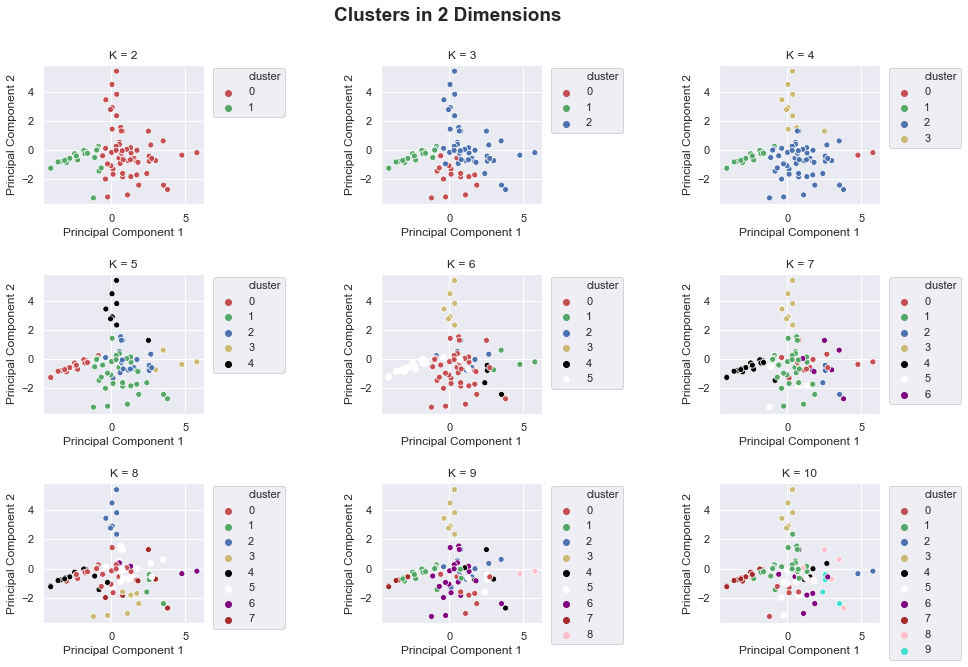

In [175]:
#your turn
# Standardize data
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x_cols)

# Get 2 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_2 = pca.fit_transform(x_scaled)

# Number of clusters
ks = range(2, 11)
# Color palette for clusters
palette =['r', 'g', 'b', 'y', 'black', 'white', 
          'purple', 'brown', 'pink', 'turquoise']

fig, ax = plt.subplots(3,3, figsize=(15,10))
for subplot, k in zip(ax.ravel(), ks): 
    # Cluster the data
    kmc = KMeans(k)
    cluster = kmc.fit_predict(x_scaled)

    # Create new data frame with principal components and cluster
    df_pca = pd.DataFrame(
                np.concatenate(
                    [x.index[:, np.newaxis], pc_2, cluster[:, np.newaxis]],
                    axis=1),
                columns=['customer_name', 'x', 'y', 'cluster'])

    # Plot clusters
    sns.scatterplot(x='x', y='y', 
                    hue='cluster',  palette=palette[:k],
                    data=df_pca, ax=subplot) 
    subplot.set_xlabel('Principal Component 1')
    subplot.set_ylabel('Principal Component 2')
    subplot.set_title('K = '+str(k))
    fig.suptitle('Clusters in 2 Dimensions', fontsize=19, fontweight='bold')
    
    subplot.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
    fig.subplots_adjust(wspace=1.1, hspace=.5, top=.9)
    
plt.show();

Note that I standardize the data to have a meeting of 0 and standard deviation of 1; if I had used a MinMax scalar instead, the results might be slightly different.

Reducing the data to two dimensions, the optimal number of clusters seems to be 2 or 3. If we choose K = 4, the smallest cluster only has 2 observations, so we are likely overfitting.  If we increase K even further, the clusters are not well separated anymore.

However, we need to keep several caveats in mind: To start with, performing a dimensionality reduction leads to a loss in information; and while we hope that it primarily discards the noise, to some extent it also loses part of the signal. Thus, while the points do not seem to be well separated in our 2-dimensional plots for K > 5, it is possible that they are in fact well separated in higher dimensional space. In particular, we chose the number of principal components based on convenience (i.e., ease of plotting) rather than any analysis of which number might provide the best look of lower-dimensional summary.

A further caveat is that, since PCA is an unsupervised method, it reduces the dimensionality without regard to the explanatory problem we are interested in (clustering customers). Thus, it is possible that the specific variables that are most useful for this particular clustering problem seem redundant when performing dimensionality reduction.  In practice, however, the dimensions found through PCA usually work quite well.

In order to interpret the meaning of the clusters, let's take the clustering with K = 5. This was the optimal number of clusters according to the silhouette method, which seems But more reliable than the other two methods.

Let's start by getting the different cluster centers:

In [263]:
kmc5 = KMeans(5, random_state=1)
cluster_centers = pd.DataFrame(
    kmc5.fit(x_cols).cluster_centers_,
    columns=x.columns, index=range(1, 6))
cluster_centers.index.name = 'cluster'

for cluster_name in cluster_centers.index:
    # Select individual cluster
    cluster = cluster_centers.loc[cluster_name,:] 
    # import pdb; pdb.set_trace()
    # Set proper name
    cluster.name = 'positive_response'
    # Keep only the more important offers
    cluster = cluster.loc[cluster > 0.2]  \
                .round(2) 
    # Sort each cluster by decreasing response
    sorted_cluster = cluster.sort_values(ascending=False) \
        .reset_index() # Make offer ID a separate column
    cluster_df = pd.merge(
        sorted_cluster, df_offers,
        on='offer_id')
    # Move offer ID back to index
    cluster_df = cluster_df.set_index('offer_id')
    
    # Print values if they are relevant enough
    print('Cluster {}:\n'.format(cluster_name),
          cluster_df,
          '\n')

Cluster 1:
           positive_response  campaign   varietal  min_qty  discount  \
offer_id                                                              
22                     1.00    August  Champagne       72        63   
6                      0.67     March   Prosecco      144        86   
3                      0.67  February  Espumante      144        32   
19                     0.50      July  Champagne       12        66   
8                      0.50     March  Espumante        6        45   
7                      0.50     March   Prosecco        6        40   
27                     0.33   October  Champagne       72        88   
4                      0.33  February  Champagne       72        48   

                origin  past_peak  
offer_id                           
22              France      False  
6                Chile      False  
3               Oregon       True  
19             Germany      False  
8         South Africa      False  
7            Australia   

In [250]:
kmc5 = KMeans(5, random_state=1)
cluster_centers = pd.DataFrame(
    kmc5.fit(x_cols).cluster_centers_,
    columns=x.columns, index=range(1, 6))
cluster_centers.index.name = 'cluster'

for cluster_name in cluster_centers.index:
    # Select individual cluster
    cluster = cluster_centers.loc[cluster_name,:] 
    # import pdb; pdb.set_trace()
    # Set proper name
    cluster.name = 'positive_response'
    # Keep only the more important offers
    cluster = cluster.loc[cluster > 0.2] 
    # Sort each cluster by decreasing response
    sorted_cluster = cluster.sort_values(ascending=False) \
        .reset_index() # Make offer ID a separate column
    # Print values if they are relevant enough
    print('Cluster {}:\n'.format(cluster_name),
          sorted_cluster.round(2),
          '\n')

Cluster 1:
    offer_id  positive_response
0        22               1.00
1         6               0.67
2         3               0.67
3         8               0.50
4         7               0.50
5        19               0.50
6        27               0.33
7         4               0.33 

Cluster 2:
    offer_id  positive_response
0        11               0.75
1        22               0.58
2        30               0.42
3        31               0.33
4        28               0.33
5         1               0.33
6         2               0.25 

Cluster 3:
    offer_id  positive_response
0        24               0.92
1        26               0.69
2        17               0.54
3         2               0.38 

Cluster 4:
    offer_id  positive_response
0        30               0.48
1         8               0.48
2        29               0.48
3         7               0.45
4        18               0.36 

Cluster 5:
    offer_id  positive_response
0        31               0.33
1 

In [241]:
kmc5 = KMeans(5, random_state=1)
cluster_centers = pd.DataFrame(
    kmc5.fit(x_cols).cluster_centers_,
    columns=x.columns, index=range(1, 6))
cluster_centers.index.name = 'cluster'
print(cluster_centers.round())

offer_id   1    2    3    4    5    6    7    8    9    10 ...    23   24  \
cluster                                                    ...              
1         0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0   
2         0.0  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 ...   0.0 -0.0   
3         0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 ...   0.0  1.0   
4        -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 ...  -0.0 -0.0   
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0 -0.0   

offer_id   25   26   27   28   29   30   31   32  
cluster                                           
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        -0.0  1.0  0.0 -0.0  0.0 -0.0  0.0  0.0  
4        -0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  
5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 32 columns]


In [226]:
df_offers

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

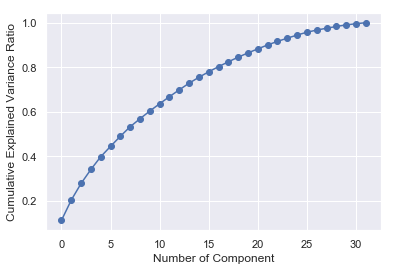

In [196]:
#your turn
pca = PCA(random_state=1).fit(x_scaled)
explained_var = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_var),
         linestyle='-', marker='o')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance Ratio');

Unfortunately, there is no clear point where adding additional dimensions does not contribute much to the explained variance. One possible value would be 28, but one could also argue for a lower value.  For example, the first 22 components explain a little over 90% of the variance, which may be enough for many applications. However, there is no clear cut of value. This simply means that the data do not lie in a lower-dimensional subspace.

We also see that the first 2 components only explain 20% of the variance. As a result, it is not surprising that plotting our data into dimensions above led as to choose a lower value for K as the other methods: Plotting the data in 2 dimensions throws away most of the information in the data, so clusters seem to be overlapping, even though they may be well-separated in high dimensions.

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [267]:
# Your turn
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit_predict(x_standardized)
af

array([ 0, 11,  1,  4,  9, 15,  6,  7, 13,  4,  3,  1,  5, 14,  7,  1,  8,
        6,  0,  2,  4,  7,  7,  3,  6, 17,  7,  8, 11,  2,  4,  7,  7,  9,
        7,  5,  2,  5,  3,  5,  1,  6,  7,  8,  5, 13,  4,  4, 11,  3,  2,
       17,  1,  6,  9,  7,  6,  4,  0, 14, 14,  7, 14,  0,  0, 10,  6, 12,
       14, 11, 12, 11, 13,  4, 14,  4,  1,  9, 15,  7, 12, 16, 17,  1,  7,
        5,  0, 11, 11,  7, 14,  0,  7,  4,  2, 14,  7, 14, 15,  8],
      dtype=int64)